# Bayesian_learning 2 - intro to Gaussian processes

**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
We are dealing with Bayesian learning and Gaussian processes in particular.

slides on:
http://www.cs.ubc.ca/~nando/540-2013/lectures/l6.pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image

# path to png's
PATH = 'C:\\Users\\Egbert\\datascience\\ubc_ml\\tut_png\\bayesian_learning\\'

- Intro:

Suppose we have a cloud of points describing the realizations of 2 variables X1, X2 (weight, height). You might get measurements that look either as in example 1) or in example 2):

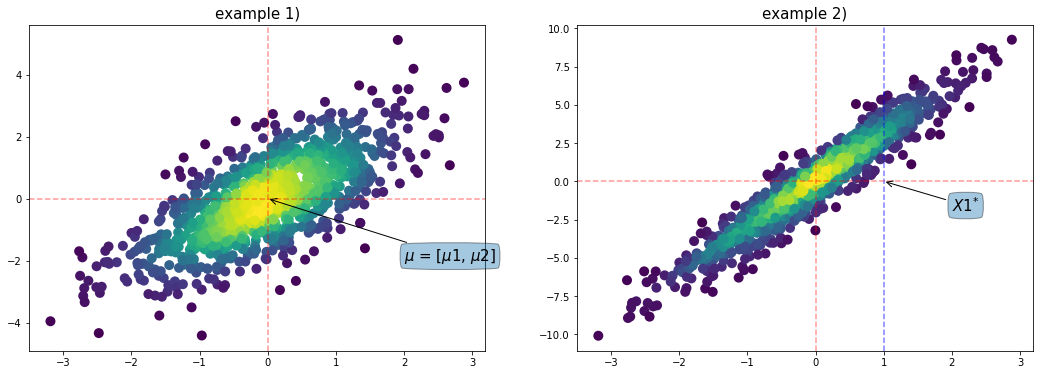

In [2]:
from scipy.stats import gaussian_kde

fig,ax = plt.subplots(1,2, figsize= [18,6])
# Generate fake data
x = np.random.normal(size=1000)
y1 = x + np.random.normal(size=1000)
y2 = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy1 = np.vstack([x,y1]); z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x,y2]); z2 = gaussian_kde(xy2)(xy2)

ax[0].scatter(x, y1, c=z1, s=100, edgecolor='')
ax[0].axvline(x=0, linestyle ='--', color='red', alpha=.4)
ax[0].axhline(y=0, linestyle ='--', color='red', alpha=.4)
ax[0].set_title('example 1)', size=15)

ax[0].annotate('$\mu$ = [$\mu1$, $\mu2$]', xy = (0,0), xytext = (2,-2), 
               size= 15, bbox = dict(boxstyle = "round4", alpha=.4), 
               arrowprops = dict(arrowstyle = '->'))

ax[1].scatter(x, y2, c=z2, s=100, edgecolor='')
ax[1].axvline(x=0, linestyle ='--', color='red', alpha=.4)
ax[1].axvline(x=1, linestyle ='--', color='blue', alpha=.5)
ax[1].axhline(y=0, linestyle ='--', color='red', alpha=.4)
ax[1].set_title('example 2)', size=15)

ax[1].annotate('$X1^{*}$', xy = (1,0), xytext = (2,-2), 
               size= 15, bbox = dict(boxstyle = "round4", alpha=.4), 
               arrowprops = dict(arrowstyle = '->'))

When we use multivariate Gaussians, we will essentially fit Gaussians to the data. In **_example 1)_** we might want to choose a Gaussian that is centered at the origin with seeminlgy a $\mu = 0$ and some covariance that is +/- circular. In example 2) this is more an ellipsis: the $\mu$ and the size of the ellipse describe the data.

In matrix notation we write $ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0\\ 0 &1 \end{bmatrix}\bigg)$ where the first bmatrix contains the $\mu = 0, 0 $ because it's centered at origin. The second bmatrix shows how the points are related to each other: how does an increase in X1 affect X2 described by **correlation** or equivalently **covariance**. 

Standard devation is the square root of the variance: $\sigma \hspace{1mm} of \hspace{1mm} X1= \sqrt {\mu _2 } = \sqrt {\mathbb{E}(X1^{2})}$ where $\mathbb{E}$ is the Expected Value (mean)

In **_example 2_** we have :

$ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0.5\\ 0.5 & 1 \end{bmatrix}\bigg)$ The covariance is essentially the **dotproduct** of X1, X2. In this case, if we take a particular value $X1^{*}$ -see fig.-, I know X2 is positive because the points are positively correlated. In the first example where the points are circular,we don't have that information.

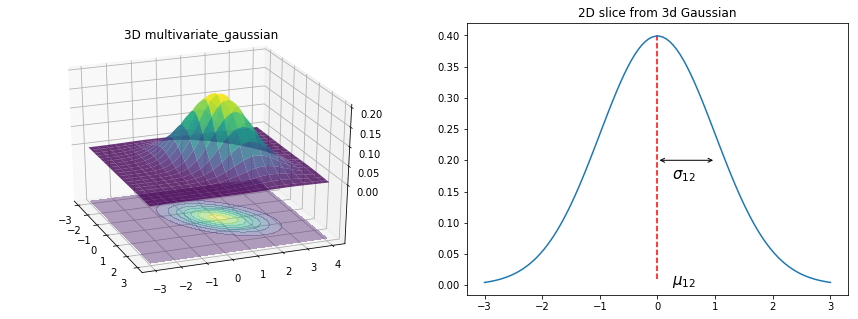

In [73]:
# source Scipy.org
from mpl_toolkits.mplot3d import Axes3D
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.5], [0.5,  1]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis, alpha=.8)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis, alpha=.4)

# Adjust the limits, ticks and view angle
ax.set(zlim= (-0.15,0.2), zticks = (np.linspace(0,0.2,5)), title = '3D multivariate_gaussian')
ax.view_init(27, -21)

# second plot representing an imaginary hyperplane slice through the multivariate Gaussian
ax = fig.add_subplot(122)
mu, variance = 0,1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
ax.plot(x,mlab.normpdf(x, mu, sigma))
ax.vlines(x=0, ymin=0.01, ymax=.4, linestyle='--', color='red')
ax.annotate('$\mu_{12}$', xy=(0.25,0), size=15)
ax.annotate(s='', xy=(1,.2), xytext=(0,.2), arrowprops=dict(arrowstyle='<->'))
ax.annotate('$\sigma_{12}$', xy=(0.25,0.17), size=15)
ax.set(title= '2D slice from 3d Gaussian')

Imagine slicing the 3D Guassian at a particular value X1 with a cutting hyperplane. 

$ \begin{bmatrix} X1 \\ X2 \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} \mu1 \\ \mu2 \end{bmatrix}, \begin{bmatrix} \sigma11 & \sigma12\\ \sigma21 & \sigma22 \end{bmatrix}\bigg)$ is the Gaussian that describes this cloud of points. The sigma for a 1D Gaussian is the width of the Gaussian and is positive otherwise it would collapse. Now I might want to know the $\mu_{12}$ and its width $\sigma_{12}$ of the Blue Gaussian on the right. What if we had to calculate these from the original model (where we know the average)? We already know how to use MLE to fit a Gaussian to a cloud of points, we know how to estimate a mean and the variance by using the sample variance estimate. How to do it for the blue curve?

This requires derivations based on the idea of the inverse matrix Lemma and lots of Algebra. Let's assume the Theorem is given to us by: $\mu_{12} = \mu_{1} + \Sigma_{12}(X_{2}-\mu_{2})$. It allows you to go from a joint distribution to a conditional distribution. 

iow: how would you go about generating a random vector that conforms to a multivariate Gaussian?

While this may sound like a bunch of big words, the intuitive idea behind all of this is: How do I generate numbers that belong the the classic Bell curve shape of the Gaussian.

**Generating 1d Gaussian random numbers**

Each floating point number between 0 and 1 has equal probability of showing up = uniform randomness. If we want to convert this number into a Gaussian random number, we need to make use of the **Central Limit Theorem**

Let's say you generate *m* uniform random numbers (between 0,1) and you use the variable $x_{i}$ to denote each of these. The Central Limit Theorem allows us to convert these m numbers belonging to $\mathbf{U}(0,1)$ into a single number that belongs to the Gaussian distribution $\mathcal{N}(0,1)$.

$x = \frac {\sum_{i}x_{i} - \frac{m}{2}} {\sqrt{\frac{m}{12}}}$

Here, $x$ is a one dimensional Gaussian random number - produced using the help of m uniform random variables. The $\frac{m}{2}$ is derived from the term $m\mu_{u}$ (where $\mu_{u}$ is the mean of the uniform distribution - $\frac{1- 0}{2} = .5$). As $m\rightarrow\infty$, we get that $x\rightarrow \mathcal{N}(0,1)$. Thus, the more uniform random numbers you use, the more accurate the "conversion" to Gaussian would be.

**Generating a multivariate Gaussian random number**

Generating an n-d Gaussian random number, we can run do the previous section n times giving us n numbers centered around 0 and independent of each other. This means, the n-d Gaussian random number generated belongs to $\mathcal{N}(0,1)$. Here 0 is an n-dimensional zero vector and $\mathcal{I}_{n}$ is a $n x n$ identity matrix (the covariance matrix describing independent components).

This is the known Gaussian distribution. Now, we need to somehow transform this into the Gaussian distribution described by the mean and covariance matrix supplied by the user.

**Linear algebra on the Gaussian distribution**

Transforming the Gaussian into the distribution we want is a simple 2-step linear transformation. 

- First, lining up covariance matrix: The Gaussian distribution we have at the moment is perfectly spherical (in n-dimensions), centered at the origin. To move towards the Covariance matrix we want, we would need to squash this spherical distribution and maybe rotate it a little bit (to get some correlation). This can be accomplished by calculating the eigenvectors and eigenvalues of the given covariance matrix and transforming the random number by matrix multiplication.

$y^{'} = \lambda^{\frac{1}{2}}\phi x$

$y^{'}$ is the transformed random number. Lambda is the diagonal matrix made up of the eigenvalues of Sigma and $\phi$ is the matrix of eigenvectors (each column is an eigenvector of Sigma).

- second step: **At this point, the covariance of the random number is in sync with Sigma but we also need to sync up the mean**. This is straightforward: we just add it: $y = y^{'}+\mu$. Voila: answer of this equation y is a Gaussian random number that belongs to the Gaussian distribution with the desired mean and covariance.

In [1]:
def get_1d_gaussian():
    """
    We define a function that generates a 1D Gaussian random number
    m: the higher m, the more random numbers to generate a single Gaussian.
    """
    m= 0 
    while m ==0:
        m = round(np.random.random() * 100)
        
    n = np.random.random(int(m))
    summation = float(np.sum(n))
    gaussian = (summation - m/2) / math.sqrt(m/12.0)

    return gaussian

In [7]:
def generate_known_gaussian(dimensions):
    """
    generate several n-dimensional Gaussian random numbers with a 
    zero mean and identity covariance
    """
    count = 1000

    ret = []
    for i in range(count):
        current_vector = []
        for j in range(dimensions):
            g = get_1d_gaussian()
            current_vector.append(g)

        ret.append( tuple(current_vector) )

    return ret

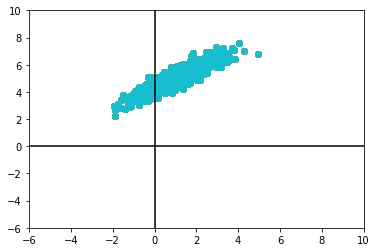

In [12]:
def main():
    known = generate_known_gaussian(2)
    target_mean = np.matrix([ [1.0], [5.0]])
    target_cov  = np.matrix([[  1.0, 0.7], 
                             [  0.7, 0.6]])

    [eigenvalues, eigenvectors] = np.linalg.eig(target_cov)
    
    l = np.matrix(np.diag(np.sqrt(eigenvalues)))
    Q = np.matrix(eigenvectors) * l
    
    x1_tweaked = [] # holds the transformed 1st dim
    x2_tweaked = [] # holds the transformed 2nd dim
    tweaked_all = [] # holds the entire vector.
    for i, j in known:
        """
        loop through all known random 2D vectors, unpack in i,j
        """
        original = np.matrix( [[i], [j]]).copy()
        # apply linear transformation: first lining up the covariance and then lining up the mean:
        tweaked = (Q * original) + target_mean 
        
        x1_tweaked.append(float(tweaked[0])) 
        x2_tweaked.append(float(tweaked[1])) 
        tweaked_all.append(tweaked)
        # scatter
        plt.scatter(x1_tweaked, x2_tweaked)
    plt.axis([-6, 10, -6, 10])
    plt.hlines(0, -6, 10)
    plt.vlines(0, -6, 10)
    plt.show()

if __name__ == "__main__":
    main()

Back to regression: Assume the following points are given:

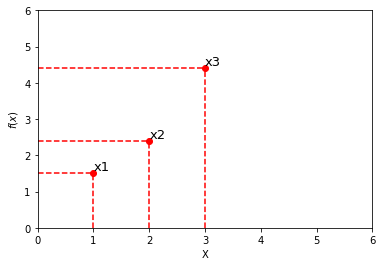

In [75]:
values =[[1,1.5],[2,2.4],[3,4.4]]
labels = ['x1', 'x2', 'x3']

fig, ax = plt.subplots()
ax.plot(*zip(*values), marker='o', color='r', ls='')

for v in values:
    ax.plot([v[0], v[0]], [0, v[1]], linestyle = '--', color='red')
    ax.plot([0, v[0]], [v[1], v[1]] ,linestyle = '--', color='red')

for i, label in enumerate(labels):
    ax.annotate(label, (values[i][0], values[i][1]), verticalalignment='bottom', size=13)

ax.set(xlabel = 'X', ylabel = '$f(x)$')
ax.axis([0,6, 0,6]);

Assume the x's are given and we want to model the f's with a multivariate Gaussian dsitribution. 
$ \begin{bmatrix} F1 \\ F2 \\ F3 \end{bmatrix} \sim \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} K11 & K12 & K13 \\ K21 & K22 & K23 \\ K31 & K32 & K33 \end{bmatrix}\bigg)$

Assume vector f has $u = 0$ and covariance matrix $K11, .. , K33$ that captures the relationship between the 3 points. X1 and X2 are quit near so it is to expected to show some correlation like:

$ \sim \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0.7 & 0.2 \\ 0.7 & 1 & 0.6 \\ 0.2 & 0.6 & 1 \end{bmatrix}\bigg)$

We saw before that matrices are cool and fast. So how can we construct a **matrix** that says X1 is highly correlated with X2? The way to do it is to let each element $K_{ij}$ be given by a **measure of similarity**. One way is the **squared exponential kernel** (by exponantial and squaring a distance)

$K_{ij} = \mathcal{E}^{\lVert x_{i} - x_{j} \rVert ^{2}}$

$K_{ij} =
\begin{cases}
0,  & \lVert x_{i} - x_{j} \rVert ^{2} \rightarrow \infty \\
1, & x_{i} =x_{j}
\end{cases}$

So if I were to fill the matrix using such a similarity function I would end up with a good model to describe that cloud of points (or at least describe their heights because the x's are given and are used to describe K.)

Let's assume we have a point $x_{*}$ and we don't know its height $(f_{*} = ?)$

$D = \big\{(x_{1}, f_{1}), (x_{2}, f_{2}), (x_{3}, f_{3}) \big\} ==> f_{*} = ?$

If I know my $f_{*}$s are distributed by a Gaussian: $\underline{\mathcal{f}} \sim \mathcal{N}(0, K)$

where $\underline{\mathcal{f}}$ is the vector f is $f_{1}, f_{2}, f_{3}$, $\mu$ is 0 and K is the covariance matrix $\begin{bmatrix} 1 & 0.7 & 0.2 \\ 0.7 & 1 & 0.6 \\ 0.2 & 0.6 & 1 \end{bmatrix}$

The assumption we make is that $f_{0}$ also comes from a Gaussian with 0 mean. We assume that the test data comes from the same distribution as the training data:

$f_{*} \sim \mathcal{N}(0, K(X_{*}, X_{*})$

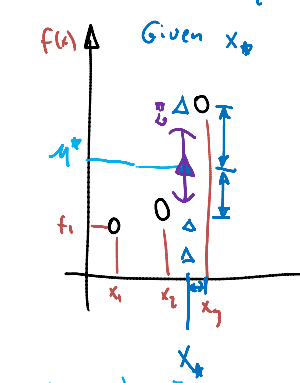

In [87]:
Image(filename = PATH + "gaussian_basics.png", width=300, height=50)

We want $f_{*}$ to be correlated so:

$ \begin{bmatrix} F \\ F_{*} \end{bmatrix} \sim \mathcal{N} \Bigg(0, \begin{bmatrix} K11 & K12 & K13 \begin{bmatrix} K1_{*} \end{bmatrix} \\ K21 & K22 & K23 \begin{bmatrix} K2_{*} \end{bmatrix} \\ K31 & K32 & K33 \begin{bmatrix} K3_{*} \end{bmatrix} \\ K_{*1} & K_{*2} & K_{*3} \begin{bmatrix} K_{**} \end{bmatrix} \end{bmatrix}\Bigg)$

where f.i $K_{1*} = K(X_{1}, X_{*})$ = the similarity between $X_{1}, X_{*}$. Now we end up with a **joint distribution** over $F, F_{*}$. If we are asked to give the conditional of $F_{*}$ given $F$ we use the **Gaussian Theorem**:

$\mathcal{u}_{*} = \mathbb{E}(F_{*}) = K^{T}K^{-1}\mathcal{f}$ where $\mathcal{u}_{*}$ is the expected value of $f_{*}$

- I can also use the Gaussian Theorem to get the variance. 

$\sigma_{*} = -K^{T}K^{-1}K{*}+ K_{**}$ will give the variance as indicated in purple in the sketch above.

For any $x_{*}$ it can now be predicted where the mean should be and I can give it confidence intervals. In other words: for a point in the test set, I can predict the mean and the variance. We can pick different $x_{*}$s and it could look like the following plot. (example from http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

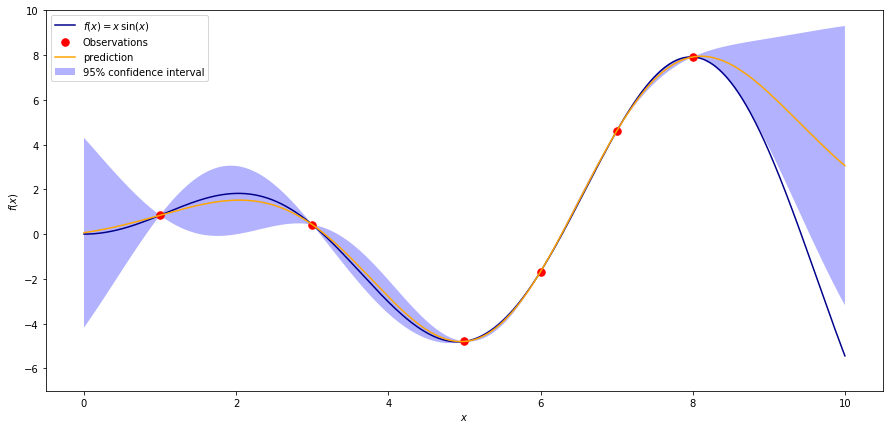

In [172]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

def f(x):
    """A function to predict."""
    return x * np.sin(x)

# create some noisy data
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T # Shape is now: (6, 1)

# observations
y = f(X).ravel() #y.shape: (6,)

# Mesh the input space for evaluations of the real function, the prediction, MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

conf_interval = 1.9600 * sigma

# ------------Instantiate the model-----------
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer=9)

# fit the data using MLE of the parameters
gp.fit(X,y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma =  gp.predict(x, return_std=True)

fig, ax = plt.subplots(figsize= [15,7])

ax.plot(x, f(x), color= 'darkblue', label=u'$f(x) = x\,\sin(x)$')
ax.plot(X, y, 'r.', markersize=15, label=u'Observations')
ax.plot(x, y_pred, color='orange', label ='prediction')
ax.fill(np.concatenate([x, x[::-1]]),
        np.concatenate([y_pred - conf_interval,
                       (y_pred + conf_interval)[::-1]]),
        alpha=.3, fc='b', ec='None', label='95% confidence interval')
ax.set(xlabel = '$x$', ylabel = '$f(x)$', ylim = [-7,10])
ax.legend(loc='upper left')

Each point on the orange line is the $\mu$. I can draw an infinite number of points and here comes the Gaussian idea: as output I'll have $\mu s + \sigma s$ and I have a function that returns the confidence intervals. The idea of confidence intervals that are small when I have data brings us to **Gaussian Processes (GP)**

### Gaussian Processes (GP)

We can describe a Gaussian process as a distribution over functions. Just as a multivariate normal distribution is completely specified by a mean vector and covariance matrix, a GP is fully specified by a mean function and a covariance function:

**$f(x) \sim GP(m(x), \mathcal{k}(x, x^{'}))$**  --where $x^{'}$ is 'x prime'

$m(x) = \mathbb{E}[f(x)]$

$\mathcal{k}(x, x^{'}) = \mathbb{E}[\hspace{1mm}f(x) - m(x))(f(x^{'}) - m({x^{'})})^{T}\hspace{1mm}]\hspace{5mm}-->  \mathcal{k}(x, x^{'}) = exp(- \frac{1}{2}(x - x^{'})^{2})$ (covariance function)

Here, the covariance function is a squared exponential, for which values of x and x^{\prime} that are close together result in values of k closer to one, while those that are far apart return values closer to zero. It may seem odd to simply adopt the zero function to represent the mean function of the Gaussian process — surely we can do better than that! It turns out that most of the learning in the GP involves the covariance function and its hyperparameters, so very little is gained in specifying a complicated mean function. For a finite number of points, the GP becomes a multivariate normal, with the mean and covariance as the mean functon and covariance function, respectively, evaluated at those points.

With the above-mentioned functions, I can get a very fine grid of points. I start creating $x_{1:N}$. for $x_{1-n}$ I create $\mu$ (in this case I choose the mean to be a 0 vector): $\mu = 0_{N}$ and I create a matrix $K_{nxn}$. This matrix can be created with the formula $\mathcal{k}(x, x^{'}) = exp(- \frac{1}{2}(x - x^{'})^{2})$ so that points that are closely together are more similar.

After I created this, we apply the Cholesky Decomposition on K: $K = LL^T$ and I draw a bunch of samples:

$f^{i} =
\begin{cases}
\sim,  & \mathcal{N} (0_{n}, K) \\
\sim, & \mathcal{N}(0, I)L
\end{cases}$
where I draw it bu standard 0,1 Gaussian variables x the Matrix L (the square root of matrix K)

This can be generated by the following code:

[-5, 5, -3, 3]

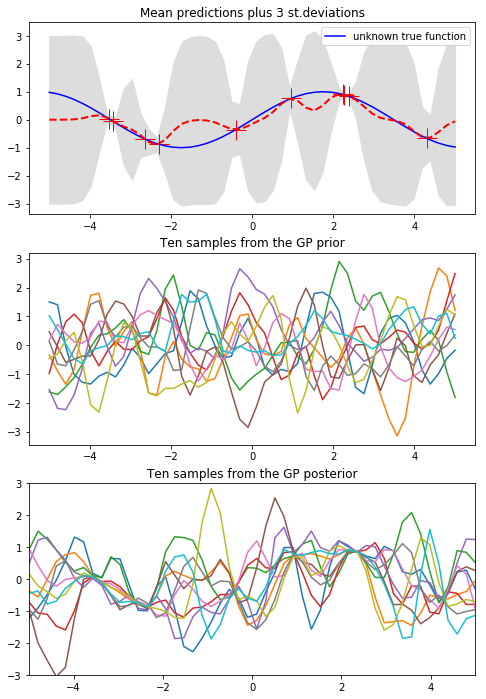

In [186]:
# modified from http://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py
from __future__ import division

""" This is code for simplte GP regression. It assumes a zero mean GP Prior """

# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()

# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points + noisy versions of the function evaluated at these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N)) 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

#plot
fig , ax = plt.subplots(3,1, figsize=[8,12])

ax[0].plot(X, y, 'r+', ms=20)
ax[0].plot(Xtest, f(Xtest), 'b-', label = 'unknown true function')
ax[0].fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
ax[0].plot(Xtest, mu, 'r--', lw=2)
ax[0].set(title = 'Mean predictions plus 3 st.deviations')
ax[0].legend(loc = 'upper right')

# draw sampltes from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
ax[1].plot(Xtest, f_prior)
ax[1].set(title= 'Ten samples from the GP prior')

# draw sampltes from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
ax[2].plot(Xtest, f_post)
ax[2].set(title = 'Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])

Other very nice code snippets can be found at: https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

### PyMC3

In [188]:
import pymc3 as pm
import theano.tensor as tt

In [193]:
with pm.Model() as gp_fit:
    ρ = pm.Gamma('ρ', 1, 1)
    η = pm.Gamma('η', 1, 1)
    K = η * pm.gp.cov.Matern32(1, ρ) # Matèrn covariance function

In [194]:
with gp_fit:
    M = pm.gp.mean.Zero()
    σ = pm.HalfCauchy('σ', 2.5) # Half-Cauchy log-likelihood

In [198]:
with gp_fit:
    y_obs = pm.gp.GP('y_obs', mean_func=M, cov_func=K, sigma=σ, observed={'X':X, 'Y':y})

The sample function called inside the Model context fits the model using MCMC sampling. By default, PyMC3 uses an auto-tuning version of HMC called the No U-turn Sampler (NUTS) that picks appropriate values for the path length and step size parameters that we saw in GPflow's sample calls. Additionally, to initialize the sampler to reasonable starting parameter values, a variational inference algorithm is run before NUTS, to yield approximate posterior mean values for all the parametes.

In [195]:
with gp_fit:
    trace = pm.sample(2000, n_init=20000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 0.34022:  23%|██▊         | 4666/20000 [00:11<00:38, 393.65it/s]
Convergence archived at 4700
Interrupted at 4,700 [23%]: Average Loss = 0.42162
100%|██████████████████████████████████████| 2500/2500 [00:33<00:00, 76.96it/s]


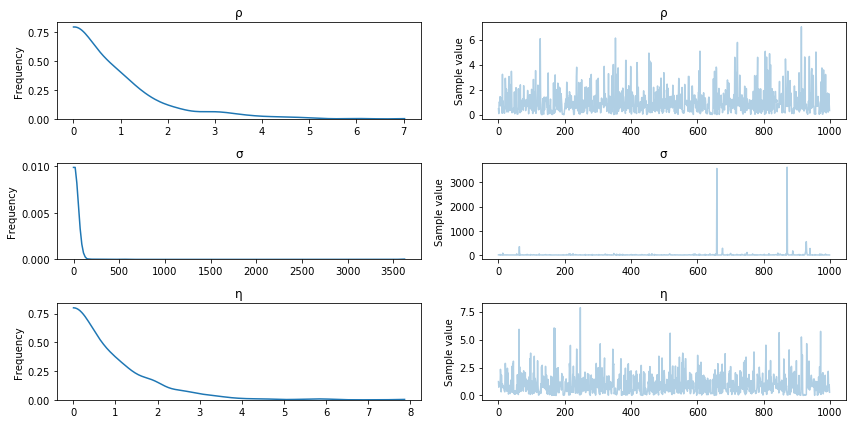

In [196]:
pm.traceplot(trace[-1000:], varnames=['ρ', 'σ', 'η']);

In addition to fitting the model, we would like to be able to generate predictions. This implies sampling from the posterior predictive distribution, which if you recall is just some linear algebra:

$m^{*}(x^{*}) = k(x^{*}, x)^T [k(x, x) + \sigma^{2}\mathcal{I}]^{-1} y \hspace{2mm}k^{*}x^{*}$

$m^{*}(x^{*}) = k(x^{*}x^{*}) + \sigma^{2} - k(x^{*}, x)^T [k(x, x) + \sigma^{2}\mathcal{I}]^{-1}$

PyMC3 allows for predictive sampling after the model is fit, using the recorded values of the model parameters to generate samples. The sample_gp function implements the predictive GP above, called with the sample trace, the GP variable and a grid of points over which to generate realizations:

In [199]:
Z = np.linspace(-6, 6, 100).reshape(-1, 1)
with gp_fit:
    gp_samples = pm.gp.sample_gp(trace[1000:], y_obs, Z, samples=50)

100%|██████████████████████████████████████████| 50/50 [00:32<00:00,  1.60it/s]


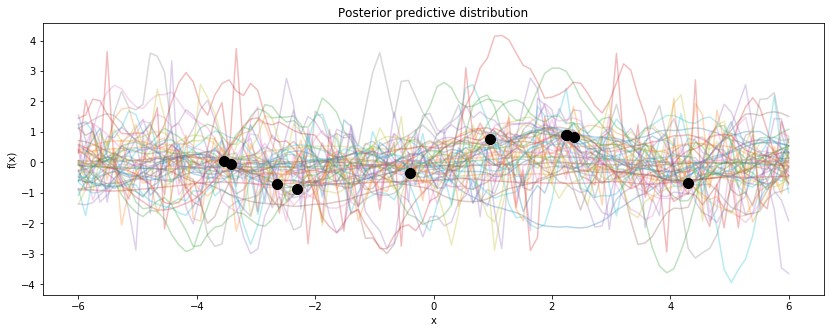

In [201]:
fig, ax = plt.subplots(figsize=(14,5))

[ax.plot(Z, x, alpha=0.3) for x in gp_samples]
# overlay the observed data
ax.plot(X, y, 'o', color="k", ms=10);
ax.set_xlabel("x");
ax.set_ylabel("f(x)");
ax.set_title("Posterior predictive distribution");

Recap

computing predictions is a question of deriving the conditional dsitribution from the joint distribution. Use your $x$s to construct your similarity matrices between the training and the test set: the self-similarities in the training-set which is $k$ and the self-similarities in the test-set which is $k_{**}$. 

$ \begin{bmatrix} F \\ F_{*} \end{bmatrix} \sim \mathcal{N} \bigg(\begin{bmatrix} \mu \\ \mu_{*} \end{bmatrix}, \begin{bmatrix} K & K_{*}\\ K_{*}^T & K_{**} \end{bmatrix}\bigg)$

Once you have contructed these matrices of similarity, $f_{*}$ is unknown, f is known from your training data and the process of prediction is computing the posterior distribution of $f_{*}$ given f. Since I have a Gaussian distribution for $X_{*}$, I cand raw samples. Each sample is f.i. a vector of 50 components that I can plot from that distribution and these are essentially predictions.

**Effect of kernel width parameter** is also important.You can decide to be very similar to points that are very closeby or a bit further away by changing the variance of the Gaussian (parameter $\mathcal{l}$. 

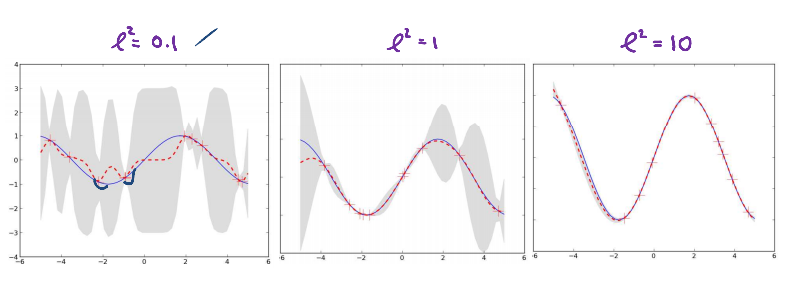

In [2]:
Image(PATH + 'gaussian_process_kernel_width.png')

Choosing a thin Kernel will result in points being very near to each other so you would expect a more wiggly function. If we increase $\mathcal{l}$ the function becomes smoother and if we keep increasing, it will be become a straight line eventually. There is a natural trade-off so we should choose the kernel width by cross-validation. (remember: when you change $\mathcal{l}$, you change K and both $\mu$ and $\sigma$ are functions of K.

### Noisy GP regression

$cov[y \rvert X] = K + \sigma_{y}^{2}I_{N} = K_{y} $ 


$ \begin{bmatrix} Y \\ F_{*} \end{bmatrix} \sim \mathcal{N} \bigg(0, \begin{bmatrix} K_{y} & K_{*} \\ K_{*}^T & K_{**}\end{bmatrix}\bigg) \Rightarrow p((f_{*}\rvert X_{*}, X, y) = \mathcal{N}(f_{*}\rvert\mu_{*}, \Sigma_{*})$

We replaced K with $K_{y}$ where $K_{y}$ has this extra $\sigma^{2}$ added to the diagonal of the co-variance matrix. The rest is as before: if we have an expression for the joint distribution, we use our theorem to get anm expression of the conditional, that includes $\mu_{*} + \Sigma{*}$.

$\mu_{*} = K_{*}^TK_{y}^{-1}y$

$\Sigma_{*} = K_{**}-K_{*}^{T}K_{y}^{-1}K_{*}$

When plotting we'll observe that even in the regions where we have data, we now have increased uncertainty because we assume that we'll always make an error of at least $\sigma^{2}$